In [1]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [2]:
# mergedf = pd.read_csv('metadata_otu_merged_famID-to-str.csv', low_memory=False)
pca = pd.read_csv('beta_div_coords200_plotReady.csv', low_memory=False)
pca5000 = pd.read_csv('beta_div_coords_5000_plotReady.csv', low_memory=False)
# mergedf = pd.read_csv('metadata_otu_merged_famID-to-str_onlyFamwPet.csv')
pca.head(1)

,Site,PCoA-1,PCoA-2,PCoA-3
0,797.27.HA.RightPalm,-9.984864,-5.165714,12.72277


In [3]:
metadata = pd.read_csv("../data/metadata_CSV.csv")
metadata.head(1)

,sample_name,age,age_in_years,age_units,agegroup,anonymized_name,body_habitat,body_product,body_site,collection_timestamp,...,role,sample_type,scientific_name,sex,taxon_id,title,tot_mass,weight,weight_loss_3_month,weight_units
0,797.02.HA.Forehead,1,1,years,Adolescent,FS_01,UBERON:skin,UBERON:sebum,UBERON:face,4/6/10,...,Offspring,skin,human skin metagenome,female,539655,Explaining variability among and between the m...,Not provided,Not provided,False,NaN


In [13]:
print(metadata.shape)
result = metadata.merge(pca, left_on="sample_name", right_on="Site", suffixes=(False,False))
result5000 = metadata.merge(pca5000, left_on="sample_name", right_on="Site", suffixes=(False,False))
# Traceback (most recent call last):
# ...
# ValueError: columns overlap but no suffix specified:
#     Index(['value'], dtype='object')
print(result.shape)
result5000

result.to_csv("PCA_with_metadata.csv")

(1071, 49)
(1050, 53)


In [5]:
metadata['env_package']=pd.Categorical(metadata['env_package'])
my_color=metadata['env_package'].cat.codes
metadata = metadata.drop('env_package', 1)


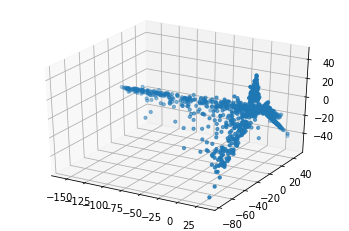

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCoA-1'], result['PCoA-2'], result['PCoA-3'], cmap="Set2_r", s=10)


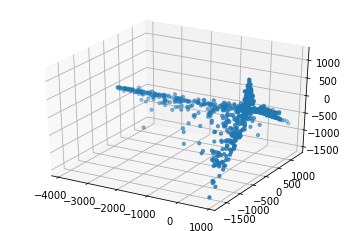

In [7]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(result5000['PCoA-1'], result5000['PCoA-2'], result5000['PCoA-3'],cmap="Set2_r", s=10)


In [16]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(result5000, x=result5000['PCoA-1'], y=result5000['PCoA-2'], z=result5000['PCoA-3']
                    ,
                    color='family', symbol='host_common_name', size_max=3, opacity=0.7)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [12]:
import plotly.express as px
# df = px.data.iris()
fig_200 = px.scatter_3d(result, x=result['PCoA-1'], y=result['PCoA-2'], z=result['PCoA-3']
                    ,
                    color='host_common_name', symbol='host_common_name', size_max=1, opacity=0.7)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_200.show()

In [9]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter(result5000, x=result5000['PCoA-1'], y=result5000['PCoA-2']
                    ,
                    color='sample_type', symbol='host_common_name', size_max=3, opacity=0.7)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [29]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter(result5000, x=result5000['PCoA-2'], y=result5000['PCoA-3']
                    ,
                    color='sample_type', symbol='host_common_name', size_max=3, opacity=0.7)
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
print(mergedf.shape)
mergedf = mergedf.drop("Unnamed: 0", axis=1)
# mergedf = mergedf[mergedf.family_relationship !="none"]
print(mergedf.shape)

In [ ]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

X = mergedf.iloc[:, 53:1085]
y = mergedf["familyID"].values.reshape(-1, 1)
print(X.shape, y.shape)
# human_data_train = mergedf[mergedf.host_common_name =="human"]
# dog_data_test = mergedf[mergedf.host_common_name =="dog"]

# X_train = human_data_train.iloc[:, 53:1085]
# X_test = dog_data_test.iloc[:, 53:1085]
# y_train = human_data_train["familyID"].values.reshape(-1, 1)
# y_test = dog_data_test["familyID"].values.reshape(-1, 1)

In [ ]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)


In [ ]:
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# PLAYING WITH FILTERING

In [ ]:

mergedf_filter = mergedf#[mergedf.role =="Partner"]
mergedf_filter = mergedf_filter[mergedf_filter.sample_type !="stool"]

X_f = mergedf_filter.iloc[:, 53:1085]
y_f = mergedf_filter["familyID"].values.reshape(-1, 1)
print(X_f.shape, y_f.shape)

In [ ]:
human_data_train = mergedf_filter[mergedf_filter.host_common_name =="human"]
dog_data_test = mergedf_filter[mergedf_filter.host_common_name =="dog"]

X_train = human_data_train.iloc[:, 53:1085]
X_test = dog_data_test.iloc[:, 53:1085]
y_train = human_data_train["familyID"].values.reshape(-1, 1)
y_test = dog_data_test["familyID"].values.reshape(-1, 1)

In [ ]:
# #Trying ShuffleSplit
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
# sss.get_n_splits(X, y)

# print(sss)

# StratifiedShuffleSplit(n_splits=5, random_state=0)
# for train_index, test_index in sss.split(X_f, y_f):
# #      print("TRAIN:", train_index, "TEST:", test_index)
#     X_train_f, X_test_f = X_f[train_index], X_f[test_index]
#     y_train_f, y_test_f = y_f[train_index], y_f[test_index]

# # X_train_f, X_test_f, y_train_f, y_test_f = rs.split(X_f, y_f)

# X_train_f.head(1)

In [ ]:
rf_f = RandomForestClassifier(n_estimators=200)
rf_f = rf_f.fit(X_train, y_train.ravel())
rf_f.score(X_test, y_test) #geni impurity coefficient